In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split
%matplotlib inline

## Importing data

In [2]:
data=pd.read_excel('data.xlsx')

### Checking first 5 rows

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking null values

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

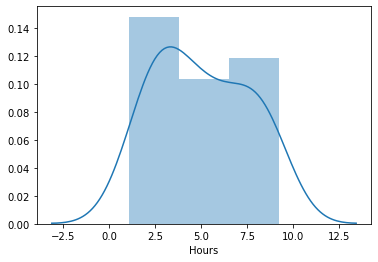

In [5]:
sns.distplot(data.Hours)
plt.show()

### Checking Relationship

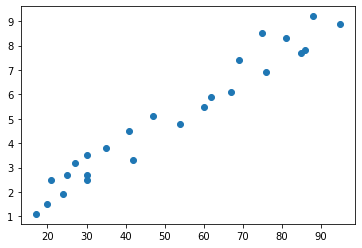

In [6]:
plt.scatter(y='Hours',x='Scores',data=data)

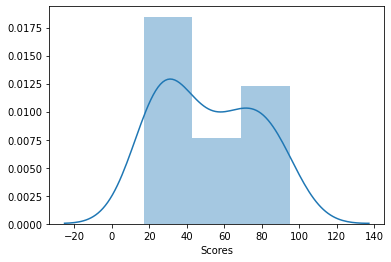

In [7]:
sns.distplot(data['Scores'])
plt.show()

### Checking Distribution of Dependent variable with Log Transfomation

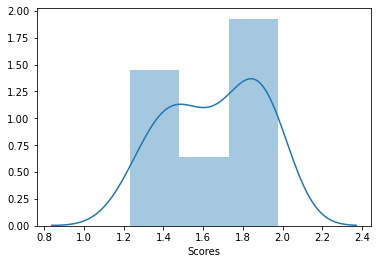

In [8]:
# Distribution of variables
sns.distplot(np.log10(data['Scores']))
plt.show()

In [9]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Checking correlation with heatmap

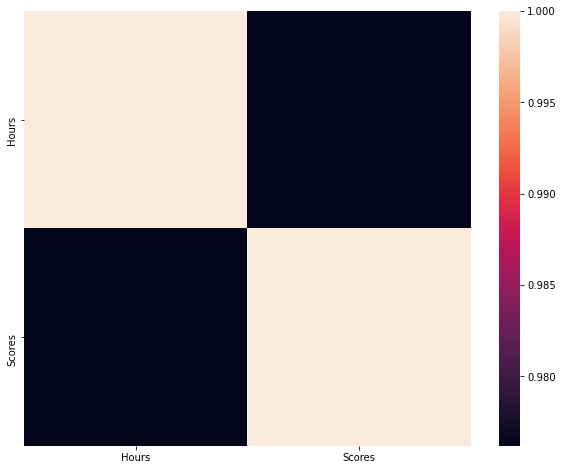

In [11]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr())
plt.show()

## Splitting Data 

In [12]:
X = data.loc[:,['Hours']]
Y = data.loc[:,['Scores']]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

### Applying Linear regression

In [14]:
linreg_model = linear_model.LinearRegression()

In [15]:

linreg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Predicting scores on Train and test data

In [17]:
X_train['pred_scores'] = linreg_model.predict(X_train)

In [18]:
X_test['pred_scores'] = linreg_model.predict(X_test)

In [19]:

MAPE_train = np.mean(np.abs((Y_train["Scores"] - X_train['pred_scores'])/Y_train["Scores"]))
MAPE_test =np.mean(np.abs((Y_test["Scores"] - X_test['pred_scores'])/ (Y_test["Scores"])))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.1209699635835783  |  MAPE of testing data:  0.10377327570078934


### Predicting Final Score On basis of study Hours

In [23]:
linreg_model.predict([[9.25]])

array([[91.51128762]])

If a student studies for 9 and half hours he will score around 91%